### **Web Scraping**: Analysis and Visualization of Literary Genres.

#### Stage:Library Import & Initialization






In [ ]:
!pip install pandas==1.3.3
!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.6.4
!pip install plotly==5.3.1


##### !pip install pandas==1.3.3:
- pip: Python's package manager.
-  pandas: Library for data manipulation and analysis.
#####  !pip install requests==2.26.0:
-  requests: Library for making HTTP requests.
##### !mamba install bs4==4.10.0 -y:
-  mamba: Fast replacement for pip and conda.
- bs4 (BeautifulSoup4): Library for web scraping.
##### !mamba install html5lib==1.1 -y:
- html5lib: Parses HTML and XML, used with BeautifulSoup.
#####  !pip install lxml==4.6.4:
- lxml: Library for processing XML and HTML.
##### !pip install plotly==5.3.1:
- plotly: Library for interactive data visualization.

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### import requests:
- requests: A library for making HTTP requests. It's used in your program to fetch web data.
##### import pandas as pd:
- pandas: A powerful data manipulation and analysis library in Python. It provides data structures, like DataFrame, making it convenient for storing and processing tabular data.
##### import matplotlib.pyplot as plt:
- matplotlib: The primary data visualization library in Python. The pyplot module, often imported as plt, provides a collection of command-style functions to create various types of plots and charts.
##### import seaborn as sns:
- seaborn: A data visualization library built on top of matplotlib. It offers a higher-level interface for creating aesthetically pleasing and informative statistical graphics.

### **Stage**: Utility Function Creation

In [21]:
def convert_rating_to_numeric(rating_text):
    rating_mapping = {
        'One': 1,
        'Two': 2,
        'Three': 3,
        'Four': 4,
        'Five': 5
    }
    return rating_mapping.get(rating_text, 0)


**Description**: A function to convert textual ratings into their numerical equivalents. For instance, 'One' becomes 1, 'Two' becomes 2, and so on.

### Configuration Setup

In [22]:
BASE_URL = "http://books.toscrape.com/"

**Description**: Define the base URL for the website from which the data will be scraped.

### Data Acquisition & Parsing

In [23]:
def extract_books(url):
    books_data = []
    current_page_url = url

    while current_page_url:
        response = requests.get(current_page_url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all products (books) on the page
        books = soup.findAll('article', class_='product_pod')

        for book in books:
            title = book.h3.a.attrs['title']
            price_string = book.find('p', class_='price_color').text
            price = float(price_string[1:])  # Remove currency symbol and convert to number
            
            # Extract the rating from the 'star-rating' class and convert it to a numeric format
            rating_element = book.find('p', class_='star-rating')
            rating_class = rating_element['class'][-1]  # Get the last class (e.g., 'Three')
            rating_text = rating_class.lower().capitalize()  # Convert to lowercase and capitalize the first letter
            rating = convert_rating_to_numeric(rating_text)
            
            availability = book.find('p', class_='availability').text.strip()

            books_data.append([title, price, rating, availability])

        # Check for the next page
        next_page = soup.find('li', class_='next')
        if next_page:
            current_page_url = url + next_page.a.attrs['href']
        else:
            current_page_url = None

    return books_data


***Description***: A function that:

Fetches and parses the HTML content from the given URL.
Extracts details of books from the current page.
Recursively checks for and moves to the next page to continue data extraction until no more pages are found.

### Data Organization & Aggregation

In [24]:
def scrape_books_by_genre():
    response = requests.get(BASE_URL)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract all genres
    genres = soup.find('div', class_='side_categories').findAll('a')[1:]  # [1:] to exclude the "Books" category

    all_data = []

    for genre in genres:
        genre_name = genre.text.strip()
        genre_link = BASE_URL + genre.attrs['href']

        # Extract books for the current genre
        genre_books = extract_books(genre_link)

        for book in genre_books:
            all_data.append([genre_name] + book)  # Add the genre to the data for each book

    df = pd.DataFrame(all_data, columns=["Genre", "Title", "Price", "Rating", "Availability"])
    return df


### Data Extraction Execution & Storage

In [25]:
df = scrape_books_by_genre()

***Description***:

- Executes the scrape_books_by_genre() function to retrieve all required data.
- The extracted data is then stored in a pandas DataFrame, which is a two-dimensional labeled data structure. This structure is particularly suited for data analysis tasks.
- This code essentially defines the steps and functions required to scrape book details from a website and organizes the collected data by genre into a structured format suitable for further analysis or visualization.

### Overview of Scraped Book Data

In [26]:
df.head()

,Genre,Title,Price,Rating,Availability
0,Travel,It's Only the Himalayas,45.17,2,In stock
1,Travel,Full Moon over Noah’s Ark: An Odyssey to Mount...,49.43,4,In stock
2,Travel,See America: A Celebration of Our National Par...,48.87,3,In stock
3,Travel,Vagabonding: An Uncommon Guide to the Art of L...,36.94,2,In stock
4,Travel,Under the Tuscan Sun,37.33,3,In stock


 ### Statistical Summary of Book Prices

In [28]:
print(df["Price"].describe())

count    517.000000
mean      35.315068
std       14.341524
min       10.010000
25%       22.540000
50%       36.260000
75%       48.190000
max       59.990000
Name: Price, dtype: float64


### Number of Books per Genre

In [29]:
print(df["Genre"].value_counts())

Childrens             20
Fiction               20
Add a comment         20
Young Adult           20
Default               20
Mystery               20
Nonfiction            20
Food and Drink        20
Fantasy               20
Romance               20
Sequential Art        20
Historical Fiction    20
Poetry                19
Classics              19
History               18
Womens Fiction        17
Horror                17
Science Fiction       16
Science               14
Music                 13
Business              12
Travel                11
Thriller              11
Philosophy            11
Humor                 10
Autobiography          9
Art                    8
Religion               7
Psychology             7
Spirituality           6
New Adult              6
Christian Fiction      6
Self Help              5
Sports and Games       5
Biography              5
Health                 4
Contemporary           3
Christian              3
Politics               3
Historical             2


### Average Rating of Books by Genre

In [30]:
print(df.groupby("Genre")["Rating"].mean().sort_values(ascending=False))


Genre
Erotica               5.000000
Adult Fiction         5.000000
Novels                5.000000
Christian Fiction     4.166667
Health                3.750000
Art                   3.625000
Poetry                3.526316
Fiction               3.450000
Humor                 3.400000
Spirituality          3.333333
New Adult             3.166667
Music                 3.153846
Religion              3.142857
Womens Fiction        3.117647
Young Adult           3.050000
Autobiography         3.000000
Historical            3.000000
Sports and Games      3.000000
Suspense              3.000000
Sequential Art        2.950000
Historical Fiction    2.950000
Fantasy               2.950000
History               2.944444
Science               2.928571
Business              2.916667
Mystery               2.900000
Nonfiction            2.850000
Default               2.800000
Add a comment         2.800000
Romance               2.800000
Thriller              2.727273
Travel                2.727273
Ho

### Price Distribution of Books
**Explanation**:
This visualization showcases the distribution of book prices using a histogram. The smooth curve, known as the Kernel Density Estimation (KDE), estimates the probability density function of the variable and provides insights into the underlying distribution. This graph allows us to quickly discern common price points, potential outliers, and the overall spread of prices in the dataset.

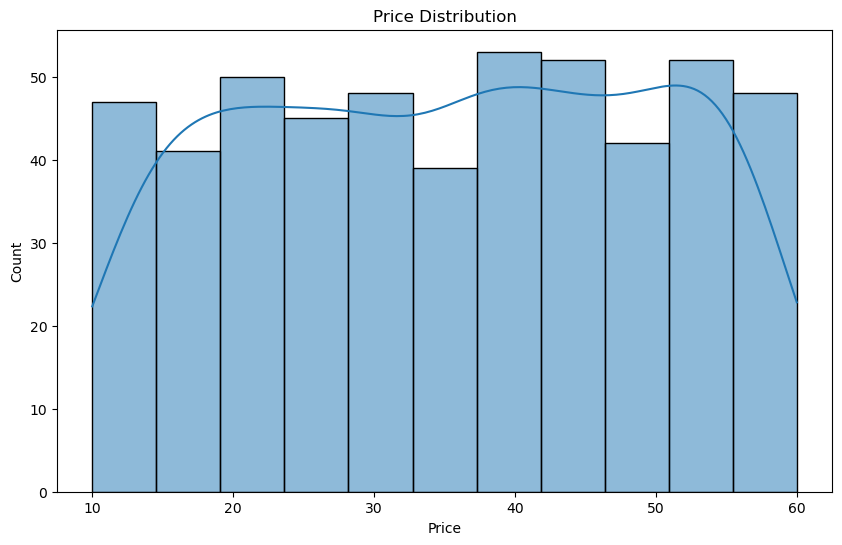

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.show()

### Number of Books per Genre
***Explanation***:
The visualization presents a count plot displaying the number of books in each genre. The genres are arranged in descending order based on the count of books they contain. This allows for easy comparison of the popularity of different genres in terms of the number of books available in the dataset. The longer bars represent genres with a higher number of books, suggesting their higher prevalence or popularity on the website.

### ***Genre Popularity***: Count of Books per Genre

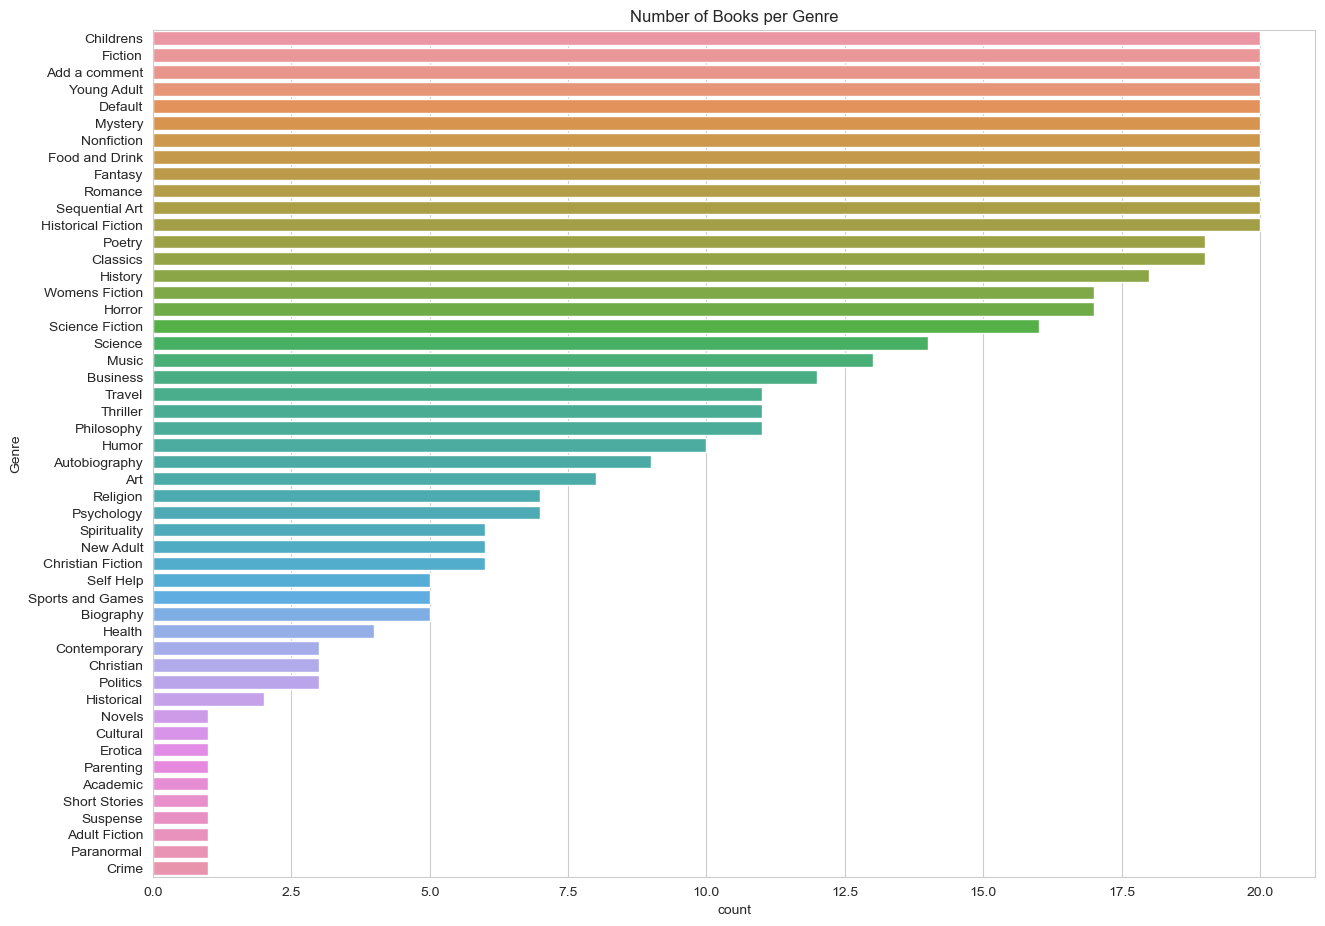

In [33]:
plt.figure(figsize=(15,11))
sns.countplot(data=df, y="Genre", order=df["Genre"].value_counts().index)
plt.title("Number of Books per Genre")
plt.show()

**Explanation**:
This visual representation shows the distribution of books across different genres. The genres are listed in descending order based on their book count, providing a clear view of which genres are more prevalent in the dataset. By interpreting this plot, one can ascertain which genres have more books and are potentially more popular or more frequently stocked on the website. The longer bars correspond to genres with a greater number of books, indicating their dominance in this collection.

### Average Book Ratings Across Genres


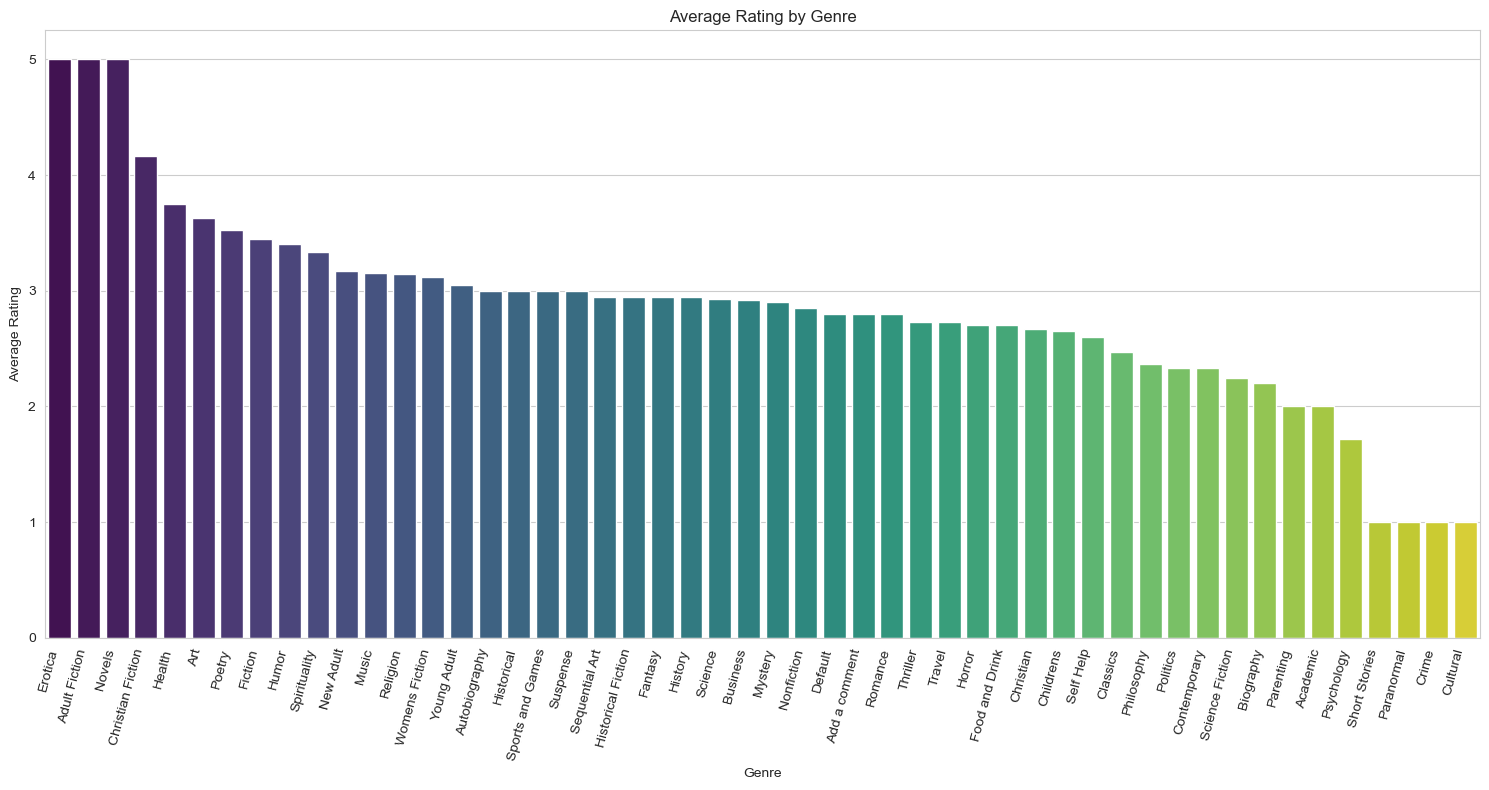

In [32]:
# Set the plotting style for better visualization
sns.set_style("whitegrid")

# Group by genres and calculate the average rating
genre_rating = df.groupby("Genre")["Rating"].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(15,8))
sns.barplot(x=genre_rating.index, y=genre_rating.values, palette="viridis")
plt.xticks(rotation=75, ha="right")  # Rotate genre names for better readability
plt.title("Average Rating by Genre")
plt.ylabel("Average Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


**Explanation**:
This visualization showcases the average ratings for books across different genres. By grouping the data by genre and calculating the mean rating for each, the bar chart depicts which genres tend to have higher average ratings, hinting at potential reader preferences.

The genres are sorted in descending order based on their average rating, providing a clear view of genres that are highly rated at a glance. The longer bars signify genres with higher average ratings. This could be instrumental in deducing which genres are generally better received by readers, according to the dataset. The choice of the "viridis" color palette ensures the bars are visually distinct and easy to interpret.